### Exploring Our Data

### We are going to use our 2018 data set instead 

In [1]:
import collections
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn import tree
#import pydotplus
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_2018 = pd.read_csv('kickstarter-projects/ks-projects-201801.csv', encoding ='iso-8859-1')

In [3]:
df_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
#Detects the live in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='live']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='undefined']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='canceled']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='suspended']

#Detects the undefined in usd pledged and drops them 
df_2018 = df_2018.loc[~df_2018['usd pledged'].isna(), :]

#Detects the undefined in usd pledged and drops them 
df_2018 = df_2018.loc[~df_2018['name'].isna(), :]

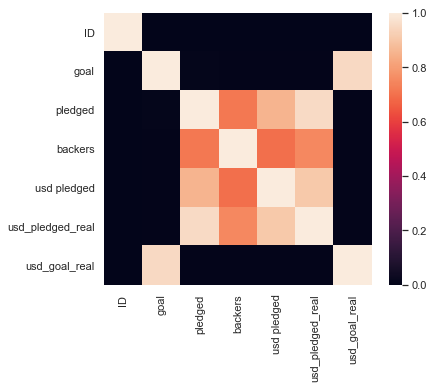

In [6]:
sns.set(rc={'figure.figsize': (6,5)})
sns.heatmap(df_2018.corr());

### A look at successes and failures by main category

In [7]:
df_2018.category.value_counts()

Product Design       18679
Documentary          14523
Music                12485
Tabletop Games       11744
Shorts               11394
Food                 10416
Video Games           9327
Film & Video          8601
Fiction               8108
Fashion               7529
Art                   7486
Nonfiction            7414
Theater               6684
Rock                  6246
Children's Books      6198
Apparel               6165
Technology            5723
Indie Rock            5329
Apps                  5287
Photography           5246
Webseries             5148
Publishing            5020
Narrative Film        4617
Comics                4581
Web                   4309
Country & Folk        4213
Crafts                4152
Design                3547
Hip-Hop               3459
Hardware              3114
                     ...  
Blues                  234
Animals                229
Couture                227
Fabrication Tools      215
Makerspaces            208
Movie Theaters         201
P

In [8]:
df_2018['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Crafts', 'Games',
       'Design', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [9]:
successful_df = df_2018.loc[df_2018['state'] =='successful']

In [10]:
failed_df = df_2018.loc[df_2018['state'] =='failed']

In [11]:
successful_list = successful_df['main_category'].tolist()

In [12]:
failed_list = failed_df['main_category'].tolist()

In [13]:
from collections import Counter
list1=successful_list
counts_s = Counter(list1)
print(counts_s)

Counter({'Music': 24105, 'Film & Video': 23612, 'Games': 12518, 'Publishing': 12300, 'Art': 11510, 'Design': 10549, 'Theater': 6534, 'Technology': 6433, 'Food': 6085, 'Comics': 5842, 'Fashion': 5593, 'Photography': 3305, 'Dance': 2338, 'Crafts': 2115, 'Journalism': 1012})


In [14]:
list2=failed_list
counts_f = Counter(list2)
print(counts_f)

Counter({'Film & Video': 32891, 'Publishing': 23113, 'Music': 21696, 'Technology': 20613, 'Games': 16002, 'Food': 15969, 'Design': 14814, 'Fashion': 14181, 'Art': 14130, 'Photography': 6384, 'Crafts': 5703, 'Comics': 4036, 'Theater': 3708, 'Journalism': 3136, 'Dance': 1235})


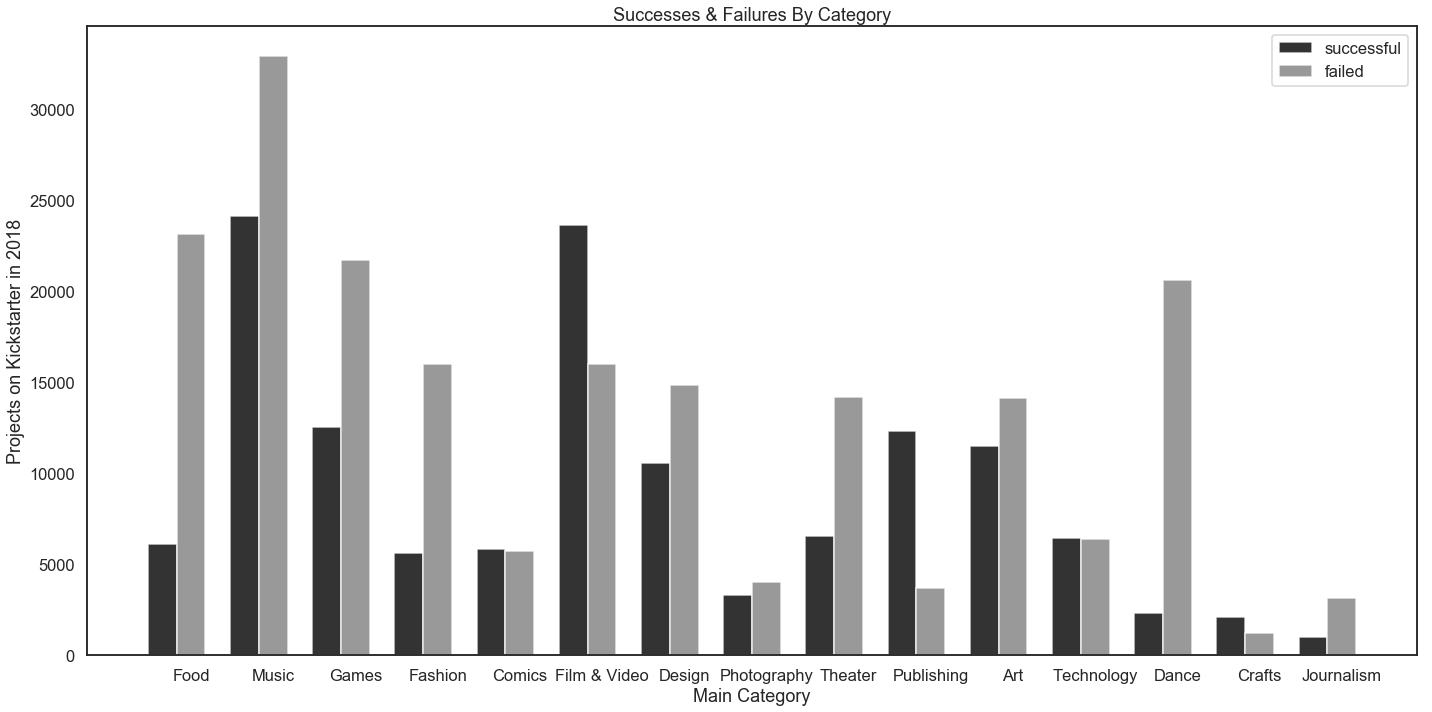

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 15
successful = counts_s.values()
failed = counts_f.values()

# create plot
fig, ax = plt.subplots(figsize=(20,10))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, successful, bar_width,
alpha=opacity,
color='black',
label='successful')

rects2 = plt.bar(index + bar_width, failed, bar_width,
alpha=opacity,
color='grey',
label='failed')

plt.xlabel('Main Category')
plt.ylabel('Projects on Kickstarter in 2018')
plt.title('Successes & Failures By Category')
plt.xticks(index + bar_width, counts_s.keys())
plt.legend()

plt.tight_layout()
plt.show()


In [73]:
successes_tuples = [(key, value) for (key, value) in sorted(counts_s.items())]

In [74]:
failed_tuples = [(key, value) for (key, value) in sorted(counts_f.items())]

In [75]:
difference = []
for i in range(15):
    numerator = list(successes_tuples[i])[1] - list(failed_tuples[i])[1]
    denominator = list(successes_tuples[i])[1] + list(failed_tuples[i])[1]
    temp = numerator/denominator
    difference.append(temp)


In [76]:
category_names = list(dict(successes_tuples).keys())

In [77]:
keys = category_names
values = difference
dictionary = dict(zip(keys, values))
print(dictionary)

{'Art': -0.10218408736349453, 'Comics': 0.18283053249645678, 'Crafts': -0.4589409056024559, 'Dance': 0.30870417016512736, 'Design': -0.16815834089027323, 'Fashion': -0.43430767674724385, 'Film & Video': -0.1642213687768791, 'Food': -0.4481726670898703, 'Games': -0.12215988779803647, 'Journalism': -0.5120540019286403, 'Music': 0.05259710486670597, 'Photography': -0.3177830529466405, 'Publishing': -0.30533984694886057, 'Technology': -0.5242919470531687, 'Theater': 0.2759226713532513}


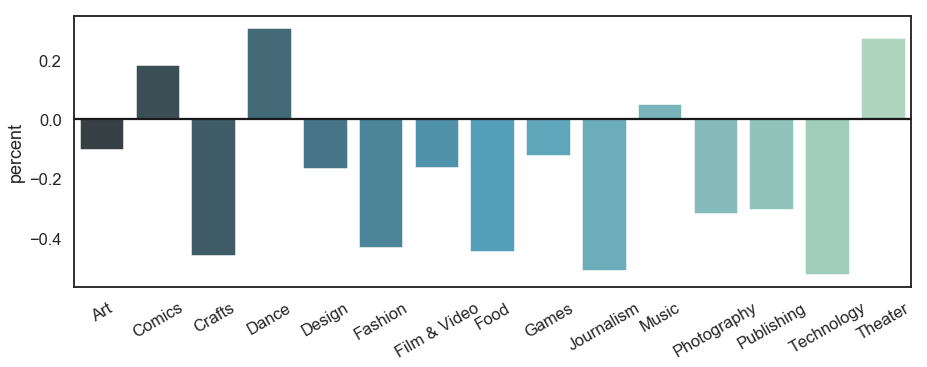

In [78]:
import matplotlib.pyplot as plt 

sns.set(style="white", context="talk")
f, ax1 = plt.subplots(figsize=(15,5))

# Generate some sequential data
x = category_names
y1 = difference
g = sns.barplot(x=x, y=y1, palette="GnBu_d")
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("percent")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

label = ["{:.2%}".format(x) for x in difference]


In [79]:
successful_list_1 = successful_df['country'].tolist()

In [80]:
failed_list_1 = failed_df['country'].tolist()

In [81]:
from collections import Counter
list1_1=successful_list
counts_s_1 = Counter(list1_1)
print(counts_s_1)

Counter({'Music': 24105, 'Film & Video': 23612, 'Games': 12518, 'Publishing': 12300, 'Art': 11510, 'Design': 10549, 'Theater': 6534, 'Technology': 6433, 'Food': 6085, 'Comics': 5842, 'Fashion': 5593, 'Photography': 3305, 'Dance': 2338, 'Crafts': 2115, 'Journalism': 1012})


In [82]:
list2_1=failed_list
counts_f_1 = Counter(list2_1)
print(counts_f_1)

Counter({'Film & Video': 32891, 'Publishing': 23113, 'Music': 21696, 'Technology': 20613, 'Games': 16002, 'Food': 15969, 'Design': 14814, 'Fashion': 14181, 'Art': 14130, 'Photography': 6384, 'Crafts': 5703, 'Comics': 4036, 'Theater': 3708, 'Journalism': 3136, 'Dance': 1235})


### Now let's start to engineer our features 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df_2018.drop("state", axis=1),
                                                    df_2018["state"],
                                                    test_size=0.25,
                                                    random_state=2019)


In [84]:
y_train.value_counts(), y_test.value_counts()


(failed        148193
 successful    100403
 Name: state, dtype: int64, failed        49418
 successful    33448
 Name: state, dtype: int64)

In [85]:
X_train.shape

(248596, 14)

## One Hot Encoding

In [86]:



encoder = OneHotEncoder(drop='first', categories="auto")
encoder.fit(X_train[["main_category", "country"]])



OneHotEncoder(categorical_features=None, categories='auto', drop='first',
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [87]:
encoder.categories_

[array(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
        'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
        'Photography', 'Publishing', 'Technology', 'Theater'], dtype=object),
 array(['AT', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK',
        'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG', 'US'],
       dtype=object)]

In [88]:
len(encoder.get_feature_names(['main_category', 'country']))

35

In [89]:
encoder.transform(X_train[["main_category", "country"]])

<248596x35 sparse matrix of type '<class 'numpy.float64'>'
	with 477651 stored elements in Compressed Sparse Row format>

In [90]:
encoder.get_feature_names(["main_category", "country"])

array(['main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games',
       'main_category_Journalism', 'main_category_Music',
       'main_category_Photography', 'main_category_Publishing',
       'main_category_Technology', 'main_category_Theater', 'country_AU',
       'country_BE', 'country_CA', 'country_CH', 'country_DE',
       'country_DK', 'country_ES', 'country_FR', 'country_GB',
       'country_HK', 'country_IE', 'country_IT', 'country_JP',
       'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US'],
      dtype=object)

In [91]:
ohe = pd.DataFrame(encoder.transform(X_train[["main_category", "country"]]).toarray(),
                  columns=encoder.get_feature_names(["main_category", "country"]))


In [92]:
X_train = X_train.reset_index(drop=True)

In [93]:
X_train.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1426698687,RAPPY: The 3D printer with position feedback c...,3D Printing,Technology,USD,2014-02-16,100000.0,2014-01-16 04:48:30,21543.00,49,US,21543.00,21543.00,100000.00
1,1633937505,Unborn in America - A New Cabaret Opera,Musical,Theater,GBP,2014-12-03,2500.0,2014-11-06 23:41:21,2600.00,74,GB,4162.44,4078.30,3921.45
2,815178419,The Chronicles of Count Carlos: Son of Dracula,Comic Books,Comics,USD,2016-09-01,12000.0,2016-07-03 19:39:13,12813.01,193,US,629.00,12813.01,12000.00
3,344407855,Hidden Love Letters,Video Games,Games,EUR,2017-11-10,500.0,2017-10-10 10:03:54,723.00,106,FR,44.60,842.59,582.70
4,2037941839,Do You Have An Outdoor Grill? Use It To Roast ...,Food,Food,USD,2016-05-10,199000.0,2016-04-10 02:44:49,104.00,6,US,104.00,104.00,199000.00


In [94]:
X_train.shape


(248596, 14)

In [95]:
ohe.shape


(248596, 35)

In [96]:
y_train.shape

(248596,)

In [97]:
X_train['launched_datetime'] = pd.to_datetime(X_train['launched'])
X_train['deadline_datetime'] = pd.to_datetime(X_train['deadline'])
X_train['project_times'] = pd.to_datetime(X_train['deadline']) - pd.to_datetime(X_train['launched'])
'''This extracts the project days from the total project time'''
X_train['project_length'] = X_train.project_times.dt.days



In [98]:
X_train = X_train.drop(["category",'goal', "launched_datetime",'deadline_datetime',"main_category", "country", "name",
                       "currency", "launched", 'project_times',"backers", "pledged", "usd_pledged_real",
                       "usd pledged", "deadline"], axis=1)


In [99]:
X_train2 = pd.concat(objs=[X_train, ohe], axis=1)

In [100]:
X_train.shape, X_train2.shape, ohe.shape

((248596, 3), (248596, 38), (248596, 35))

## Model 1: Decision Tree Classifier

In [101]:
X_train2.head()

,ID,usd_goal_real,project_length,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1426698687,100000.00,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1633937505,3921.45,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,815178419,12000.00,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,344407855,582.70,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2037941839,199000.00,29,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [102]:
X_train2.shape

(248596, 38)

In [103]:
clf = DecisionTreeClassifier(random_state=2019,
                             min_samples_leaf=30,
                             criterion="gini",
                             min_samples_split=2)

clf.fit(X_train2, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2019, splitter='best')

In [104]:
# # Create DOT data
# dot_data = tree.export_graphviz(clf, 
#                                 out_file=None, 
#                                 feature_names=X_train.columns,  
#                                 class_names=["failed", "successful"])

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

## How well did our model do? 

In [105]:
encoder = OneHotEncoder(drop='first', categories="auto")
encoder.fit(X_test[["main_category", "country"]])

OneHotEncoder(categorical_features=None, categories='auto', drop='first',
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [106]:
ohe = pd.DataFrame(encoder.transform(X_test[["main_category", "country"]]).toarray(),
                   columns=encoder.get_feature_names(["main_category", "country"]))
ohe.head()

,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [107]:
X_test = X_test.reset_index(drop=True)

In [108]:
X_test['launched_datetime'] = pd.to_datetime(X_test['launched'])
X_test['deadline_datetime'] = pd.to_datetime(X_test['deadline'])
X_test['project_times'] = pd.to_datetime(X_test['deadline']) - pd.to_datetime(X_test['launched'])
'''This extracts the project days from the total project time'''
X_test['project_length'] = X_test.project_times.dt.days

In [109]:
X_test = X_test.drop(["category", 'goal',"launched_datetime",'deadline_datetime',"main_category", "country", "name",
                       "currency", "launched", 'project_times',"backers", "pledged", "usd_pledged_real",
                       "usd pledged", "deadline"], axis=1)

In [110]:
X_test2 = pd.concat(objs=[X_test, ohe], axis=1)

In [111]:
clf = DecisionTreeClassifier(random_state=2019,
                             min_samples_leaf=30,
                             criterion="gini",
                             min_samples_split=2)

clf.fit(X_test2, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2019, splitter='best')

In [112]:
# # Create DOT data
# dot_data = tree.export_graphviz(clf, 
#                                 out_file=None, 
#                                 feature_names=X_train.columns,  
#                                 class_names=["failed", "successful"])

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

In [113]:
y_pred = clf.predict(X_test2)

In [114]:
y_pred = pd.Series(y_pred)

In [115]:
y_train = y_train.replace('successful', 1)
y_train = y_train.replace('failed', 0)

y_test = y_test.replace('successful', 1)
y_test = y_test.replace('failed', 0)

y_pred = y_pred.replace('successful', 1)
y_pred = y_pred.replace('failed', 0)

In [116]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :69.92735259334347

AUC is :0.67

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,7287,3437,10724
1,5036,2408,7444
All,12323,5845,18168


## Optimizing Model 1

Now we will prune our decision tree

We can prune our trees using the following parameters:

Maximum Depth
Reduce the depth of the tree to build a generalized tree. 

Minimum Samples Leaf with Split
Restrict the size of sample leaf

Minimum Leaf Sample Size
Size in terminal nodes can be fixed to 30, 100, 300 or 5% of total

Maximum Leaf Nodes
Reduce the number of leaf nodes

Maximum Features
Maximum number of features to consider when splitting a node

In [117]:
from sklearn.metrics import roc_curve, log_loss
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


## Model 2: Ensemble Methods

Build a regular decision tree

In [118]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(X_train2, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [119]:
from datetime import datetime
startTime = datetime.now()

#do something
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(X_train2, y_train)
print(datetime.now() - startTime)


0:00:00.771242


In [120]:
from sklearn.metrics import confusion_matrix, classification_report
pred = tree_clf.predict(X_test2)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40220  9198]
 [15722 17726]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76     49418
           1       0.66      0.53      0.59     33448

    accuracy                           0.70     82866
   macro avg       0.69      0.67      0.68     82866
weighted avg       0.69      0.70      0.69     82866



In [121]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))


Testing Accuracy for Decision Tree Classifier: 69.93%


Build a bagged tree

In [124]:
from sklearn.ensemble import BaggingClassifier

In [125]:
from datetime import datetime
startTime = datetime.now()

#do something
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=7), n_estimators=20)
bagged_tree.fit(X_train2, y_train)
print(datetime.now() - startTime)

0:00:18.807853


In [126]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=7), n_estimators=20)
bagged_tree.fit(X_train2, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [127]:
print(bagged_tree.score(X_train2, y_train))
print(bagged_tree.score(X_test2, y_test))

0.6469975381743873
0.6473463181521976


Build a random forest

In [128]:
from sklearn.ensemble import RandomForestClassifier


In [129]:
from datetime import datetime
startTime = datetime.now()

#do something
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train2, y_train)
print('Time to run algorithm is: {datetime.now() - startTime}')

Time to run algorithm is: {datetime.now() - startTime}


In [130]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
forest.score(X_test2, y_test)


0.6333236791929139

In [132]:
from sklearn.metrics import roc_curve, auc

#First calculate the probability scores of each of the datapoints:
forest.fit(X_train2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
y_score = forest.predict_proba(X_test2)[:, 1]

In [134]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.6825303819404532


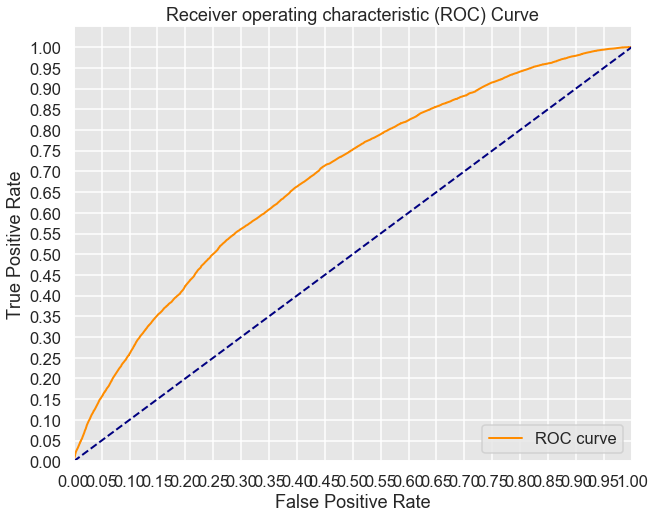

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [136]:
log_loss_randf = log_loss(y_test, y_score)
log_loss_randf 

0.6366392822369529

In [138]:
from sklearn.model_selection import train_test_split, cross_val_score

In [139]:
cv_scores = cross_val_score(forest, X_train2, y_train, cv=5)
cv_scores

array([0.63211987, 0.63338697, 0.63000805, 0.6314011 , 0.6328895 ])

## Model 3: Log Regression


In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
logr = LogisticRegression()

In [142]:
from datetime import datetime
startTime = datetime.now()

#do something
logr.fit(X_train2, y_train)
print(datetime.now() - startTime)

/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0:00:00.992753


In [143]:
logr.fit(X_train2, y_train)

/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
y_score_logr = logr.predict_proba(X_test2)[:, 1]

In [145]:
fpr_logr, tpr_logr, thresholds_logr = roc_curve(y_test, y_score_logr)

AUC: 0.5261691974758396


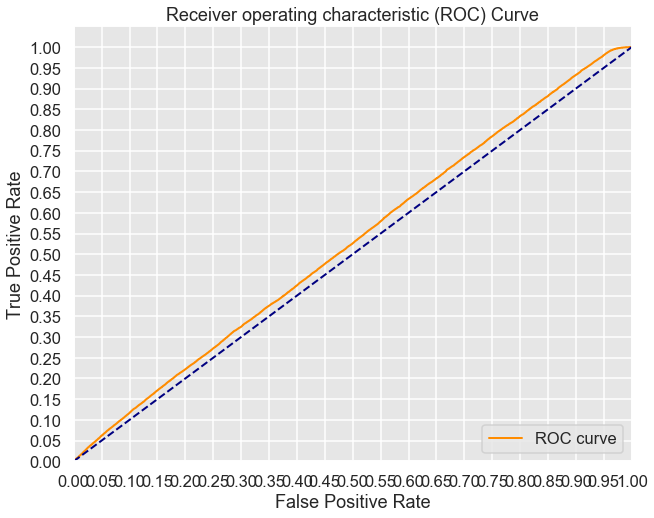

In [146]:

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr_logr, tpr_logr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr_logr, tpr_logr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [147]:
log_loss_logr = log_loss(y_test, y_score_logr)
log_loss_logr

0.6736746695959567

In [148]:
cv_scores_logr = cross_val_score(logr, X_train2, y_train, cv=5)
print(f'THe CV score for n = 5 is {cv_scores_logr}')

/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/lo

THe CV score for n = 5 is [0.59611826 0.59611826 0.59611826 0.59612213 0.59612213]


In [149]:
log_loss_logr, log_loss_randf

(0.6736746695959567, 0.6366392822369529)

In [150]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper, FunctionTransformer, gen_features, pipeline
from sklearn_pandas.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import xgboost as xgb
import os


In [151]:
classifiers = [RandomForestClassifier(n_estimators=100, max_depth=5), xgb.XGBClassifier(),
               GradientBoostingClassifier(n_estimators=100)]

0:00:19.043227
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Log-loss Metric
0.6384103919891999


AUC: 0.6823106465113766


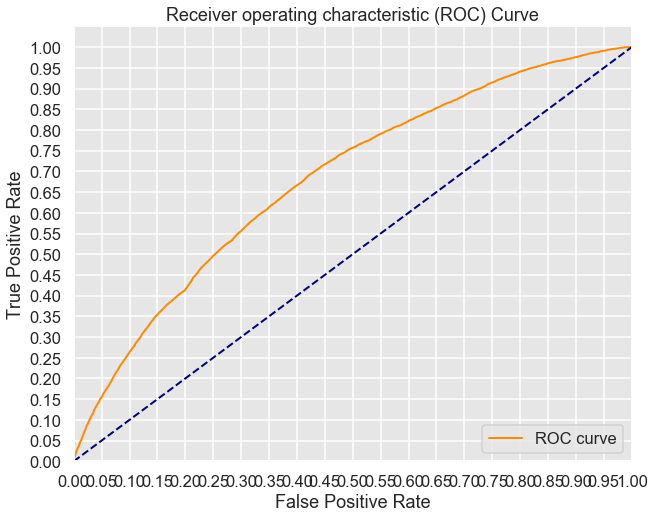



Average Cross Val Score, k=5
0.634


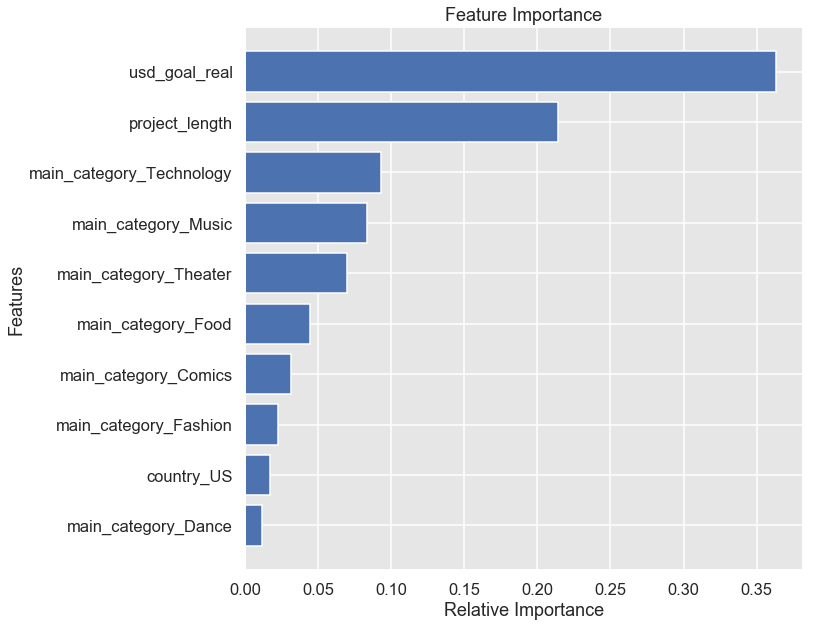

0:00:35.625046
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)
Log-loss Metric
0.607106893273315


AUC: 0.707927379154008


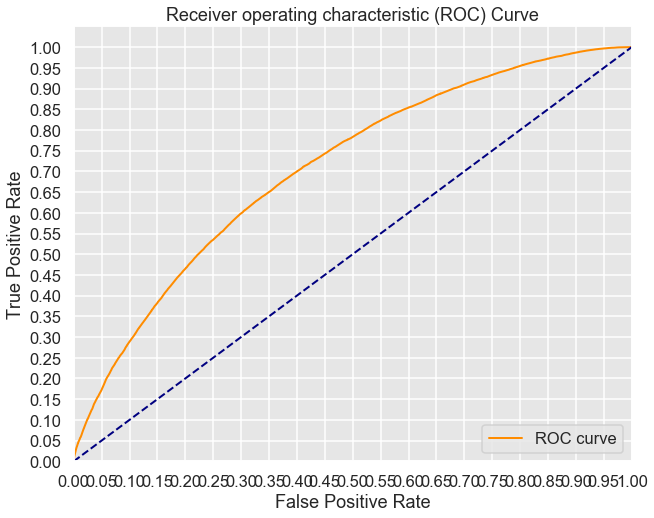



Average Cross Val Score, k=5
0.661


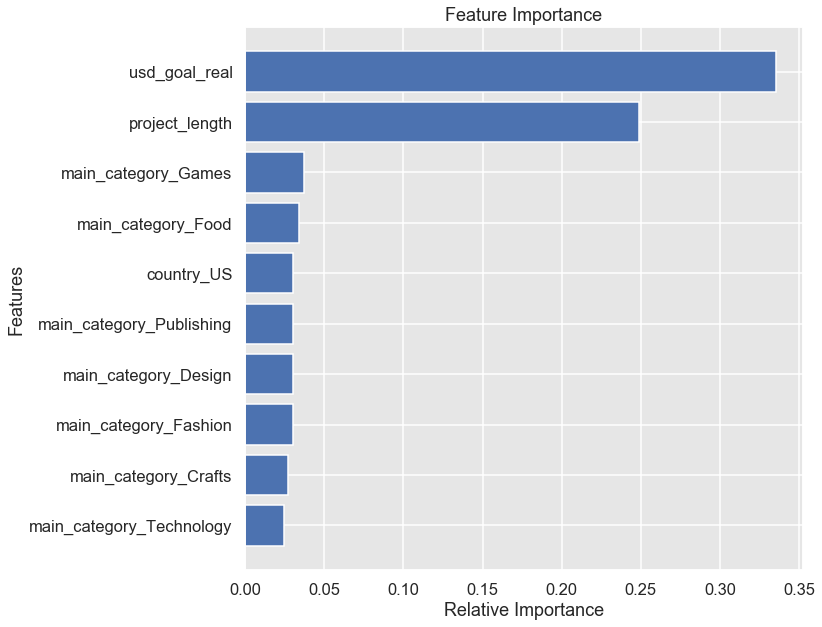

0:00:46.820780
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Log-loss Metric
0.6068171861312273


AUC: 0.708568241385455


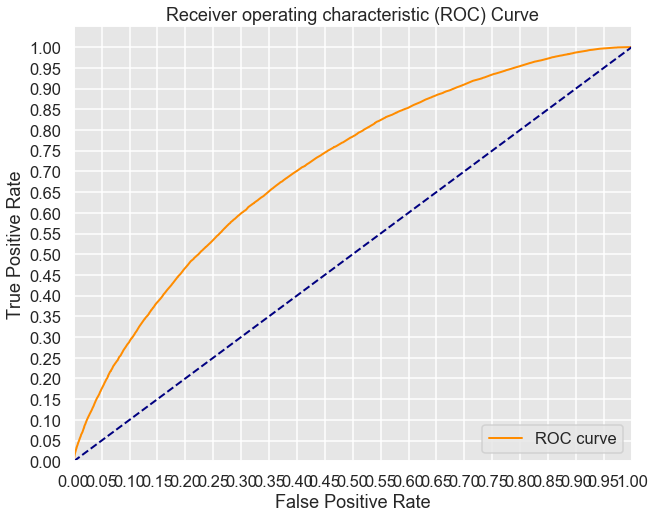



Average Cross Val Score, k=5
0.661


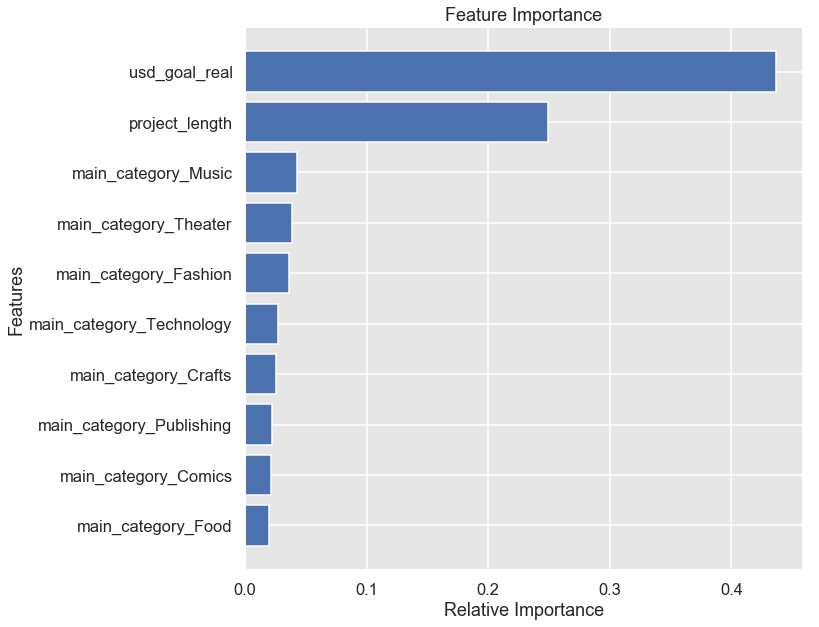

In [152]:
cv_list = []

for classifier in classifiers:
    clf1 = Pipeline(steps=[('classifier', classifier)])
    startTime = datetime.now()
    clf1.fit(X_train2, y_train)
    print(datetime.now() - startTime)
    y_score = clf1.predict_proba(X_test2)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    cv_scores = cross_val_score(clf1, X_train2, y_train, cv=5)
    cv_list.append(cv_scores)
    print(classifier)
    print("Log-loss Metric")
    print(log_loss(y_test, y_score))
    print('\n')
    #Seaborns Beautiful Styling
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    print('AUC: {}'.format(auc(fpr, tpr)))
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    print('\n')
    print('Average Cross Val Score, k=5')
    print('{:.3}'.format(np.mean(cv_scores)))
    
    ifeats = clf1.named_steps['classifier'].feature_importances_
    feature_importance = pd.DataFrame(ifeats, index=list(X_train2.columns),
                                 columns = ['importance']).sort_values('importance', ascending=False)

    fig, ax = plt.subplots(figsize=(10,10))

    ax.barh(feature_importance.head(10).index, width=feature_importance.head(10).importance)
    plt.gca().invert_yaxis()
    plt.title('Feature Importance')
    plt.xlabel('Relative Importance')
    plt.ylabel('Features')
    plt.show()

## Observations
- seems like our xgboost classifier edges out the Gradient boosting classifer by a hair, and is also faster in terms of length of time to run. 

- Now lets try to make a pipeline to find the best parameters!





## Looking at scores, which one matters most? 

As a rule of thumb, if the cost of having False negative is high, we want to increase the model sensitivity and recall!

On the other hand, if the cost of having False positive is high, then we want to increase the model specificity and precision! 

In our case, a false negative is -- the project would do well on kickstarter but we classified it as failing -- and a false positive is -- the project would fail on kickstarter but we classified it as successful.

The cost of our False positive is higher

## PCA

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
scaled_data = ss.fit_transform(X_train2)

In [ ]:
scaled_df = pd.DataFrame(data=scaled_data)

In [ ]:
pca = PCA(n_components=2)
#pca_data = pca.fit_transform(scaled_df)
pca_data = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=pca_data, columns=['pca1','pca2'])

In [ ]:
model= KMeans(n_clusters=4, random_state=2019).fit(pca_df)
model_label = model.labels_
model_centers= model.cluster_centers_

fig = plt.figure(figsize=(12,15))
ax = fig.add_subplot(111)
scatter = ax.scatter(pca_df['pca1'],pca_df['pca2'],
                    c=model_label,s=50)
ax.set_title("K-Means Clustering")
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0],model_centers[:,1],c='red',marker='*')

In [ ]:
pca_component_df = pd.DataFrame(pca.components_)

In [ ]:
pca_component_df.head()

In [ ]:
pca_c_df = pca_component_df.T 

In [ ]:
pca_c_df.columns = ['pca1','pca2']


In [ ]:
pca_c_df.head()

In [ ]:
pca_c_df['pca1'].sort_values(ascending=False).head(5)

In [ ]:
pca_c_df['pca2'].sort_values(ascending=False).head(5)

In [ ]:
pca.explained_variance_

In [ ]:
pca2= PCA(.90)
pca2.fit(scaled_df)

In [ ]:
pca2.n_components_

In [ ]:
X_train2.shape

In [ ]:
np.sort(pca.components_[0])

In [ ]:
for pca in pca.components_:
    print(np.amax(pca),np.argmax(pca))

In [ ]:
np.amax(pca.components_[0]),np.argmax(pca.components_[0])

In [ ]:
def max(arr):
    max_ = arr[0]
    for item in arr:
        if item > max_:
            max_ = item
    return max_  

In [ ]:
sorted(list(pca.components_[0]),reverse=True)

In [ ]:
pca.components_[0]

In [ ]:
sorted(list(pca.components_[1]),reverse=True)

In [ ]:
pca.components_[1]

In [ ]:
df_2018_concat.head()

In [ ]:
predictors, target = (df_2018_concat.drop("state", axis=1),df_2018_concat["state"])

In [ ]:
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100, max_depth=5), 
               GradientBoostingClassifier(n_estimators=100), xgb.XGBClassifier()]

## K Means Clustering

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabaz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
ss = StandardScaler()
scaled_data = ss.fit_transform(X_train2)

In [ ]:
scaled_df=pd.DataFrame(data=scaled_data)

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_data, columns=['pca1', 'pca2'])

In [ ]:
model = KMeans(n_clusters=3, random_state=10).fit(pca_df) # Must set number of clusters at initialization time!
model_label = model.labels_
model_centers= model.cluster_centers_

# cluster predictions for each point are also stored in k_means.labels_ attribute

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(pca_df['pca1'], pca_df['pca2'],
                    c=model_label, s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='*');

In [ ]:
pca.components_

In [ ]:
ss = StandardScaler()
scaled_data = ss.fit_transform(X_test2)

In [ ]:
scaled_df=pd.DataFrame(data=scaled_data)

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_data, columns=['pca1', 'pca2'])

In [ ]:
model = KMeans(n_clusters=3, random_state=10).fit(pca_df) # Must set number of clusters at initialization time!
model_label = model.labels_
model_centers= model.cluster_centers_

# cluster predictions for each point are also stored in k_means.labels_ attribute

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(pca_df['pca1'], pca_df['pca2'],
                    c=model_label, s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='*');

In [ ]:
pca.components_